In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/train.csv'
df = pd.read_csv(url)

In [3]:
df = df.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot: >

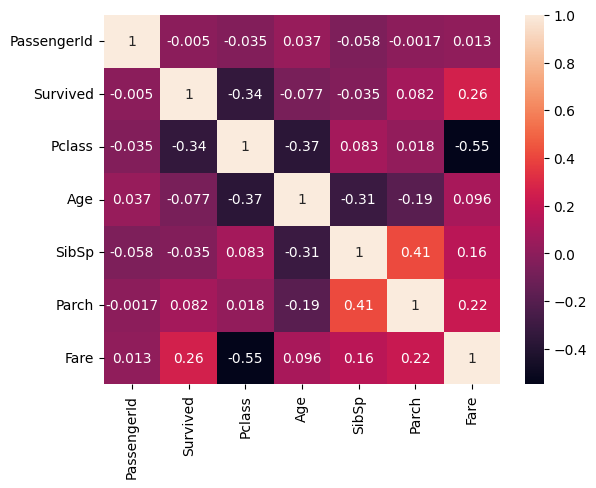

In [6]:
sns.heatmap(df.corr(), annot=True)

In [7]:
from tensorflow.keras.datasets import mnist

In [8]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11490434/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
import matplotlib.pyplot as plt

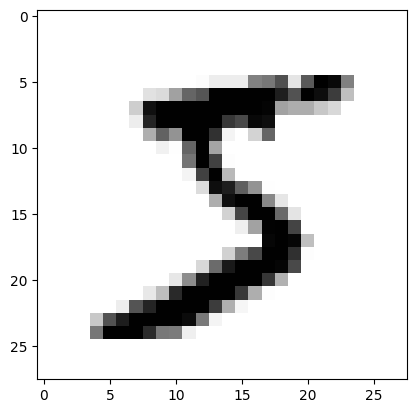

In [11]:
plt.imshow(x_train[0], cmap='gray_r')

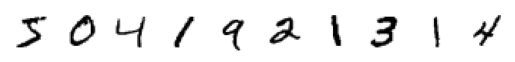

In [13]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap='gray_r')
    plt.axis('off')

# 머신러닝

In [14]:
from xgboost import XGBClassifier

In [15]:
xgb = XGBClassifier(n_estimators=100, max_depth=3)

In [17]:
x_train = x_train.reshape(60000, 28*28)

In [18]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [20]:
xgb.score(x_train, y_train)

0.9817166666666667

In [19]:
x_test = x_test.reshape(-1,28*28)
xgb.score(x_test, y_test)

0.9637

In [21]:
from sklearn.model_selection import cross_validate

In [23]:
xgb = XGBClassifier(n_estimators=100, max_depth=3)
scores = cross_validate(xgb,x_train,y_train, return_train_score=True)

### 신경망 - 신경망 연결(모델) - 모델 컴파일 - 학습

In [24]:
import tensorflow as tf

In [26]:
dense = tf.keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = tf.keras.Sequential(dense)
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics='acc')

In [28]:
x_train = x_train/255.0
scores=model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5554 - acc: 0.8481
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2971 - acc: 0.9145
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2847 - acc: 0.9201
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2792 - acc: 0.9226
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2754 - acc: 0.9245
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - acc: 0.9264
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2712 - acc: 0.9271
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2698 - acc: 0.9269
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2687 - acc: 0.9287
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2683 - acc: 0.9291
Epoch 11/100
1875/1

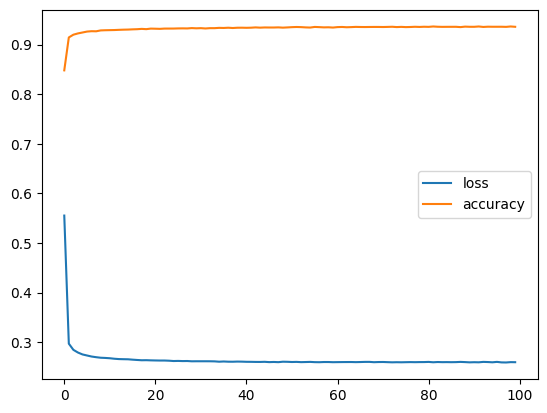

In [30]:
plt.plot(scores.history['loss'],label='loss')
plt.plot(scores.history['acc'], label='accuracy')
plt.legend()

In [31]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2558 - acc: 0.9366


[0.25580328702926636, 0.9366333484649658]

In [29]:
from sklearn.linear_model import SGDClassifier

In [32]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train), sgd.score(x_test, y_test)

(SGDClassifier(), 0.8108)

In [33]:
iris = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/iris.data', header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
target           3
dtype: int64

In [37]:
import seaborn as sns

<AxesSubplot: xlabel='sepal_length', ylabel='count'>

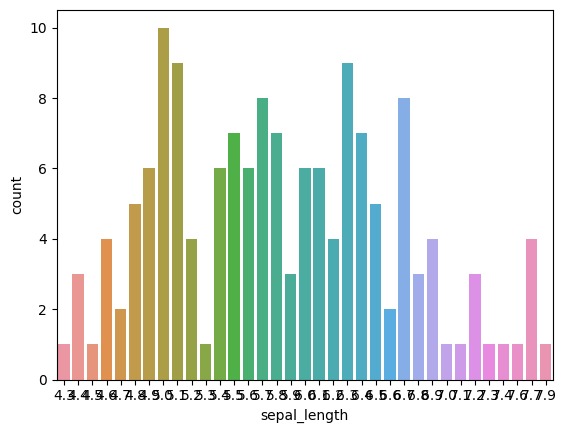

In [38]:
sns.countplot(data=iris, x='sepal_length')

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

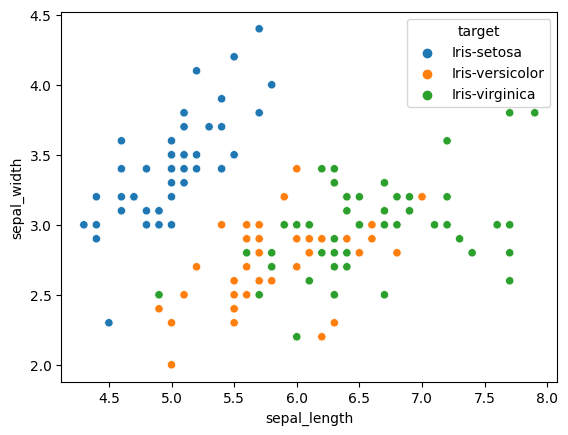

In [41]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='target')

In [42]:
np.unique(iris.target)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [43]:
pd.get_dummies(iris.target)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [46]:
Y = one_hot_target = pd.get_dummies(iris.target)

In [45]:
np.unique(iris.target)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [47]:
X = iris.iloc[:,:-1]

In [48]:
X.shape, Y.shape

((150, 4), (150, 3))

In [49]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [53]:
le = LabelEncoder()
Y = le.fit_transform(iris.iloc[:,-1])

In [51]:
onehot = OneHotEncoder()
onehot.fit_transform(iris.iloc[:,-1].to_numpy().reshape(-1,1))

<150x3 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [52]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [56]:
x_train.shape

(120, 4)

In [57]:
dense = tf.keras.layers.Dense(3, activation='softmax', input_shape=(4,))
model = tf.keras.Sequential(dense)
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics='acc')

In [58]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 4ms/step - loss: 5.3544 - acc: 0.3667
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 5.2344 - acc: 0.3667
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 5.1464 - acc: 0.3667
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 5.0687 - acc: 0.3667
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 4.9969 - acc: 0.3667
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 4.9275 - acc: 0.3667
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 4.8602 - acc: 0.3667
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 4.7935 - acc: 0.3667
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 4.7275 - acc: 0.3667
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 4.6609 - acc: 0.3667
